In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style for professional looking plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Display all columns (useful if the dataset is wide)
pd.set_option('display.max_columns', None)


Matplotlib is building the font cache; this may take a moment.


# 1. Data Loading and Initial Inspection
Loading the raw financial news dataset to understand its structure, volume, and data types.

In [ ]:
# Define filepath (Adjust based on where you saved your csv)
from pathlib import Path

# This assumes a 'data' folder next to the 'nootbooks' folder; change if needed
file_path = Path('../data/raw_analyst_ratings.csv')

# Load the data with helpful error handling
df = None
if not file_path.exists():
    print(f"Error: File not found at path: {file_path.resolve()}")
    print('Current directory contents:')
    for p in sorted(Path('.').iterdir()):
        print(' -', p.name)
else:
    try:
        df = pd.read_csv(file_path)
        print("Data loaded successfully!")
        display(df.head())
    except pd.errors.EmptyDataError:
        print(f"File found but is empty: {file_path}")
        df = None
    except Exception as e:
        print('Error reading CSV:', e)
        df = None

# If df is None at this point, adjust the path above or move the CSV into the expected folder.




Data loaded successfully!


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
# Check data structure and types
print("--- Data Info ---")
df.info()

# Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB

--- Missing Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int

## Data Preprocessing
Converting the 'date' column from string object to datetime objects for time-series analysis.

In [5]:
# Convert date column to datetime, handling the specific format with offsets
# errors='coerce' will turn unparseable dates into NaT (Not a Time)
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)

# Verify the conversion works
print(df['date'].dtype)
df.head(3)

datetime64[ns, UTC]


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A


## Descriptive Statistics
Analyzing the volume of articles, active publishers, and headline lengths.

Total unique publishers: 1034


C:\Users\FORWARD\AppData\Local\Temp\ipykernel_6600\928528799.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')


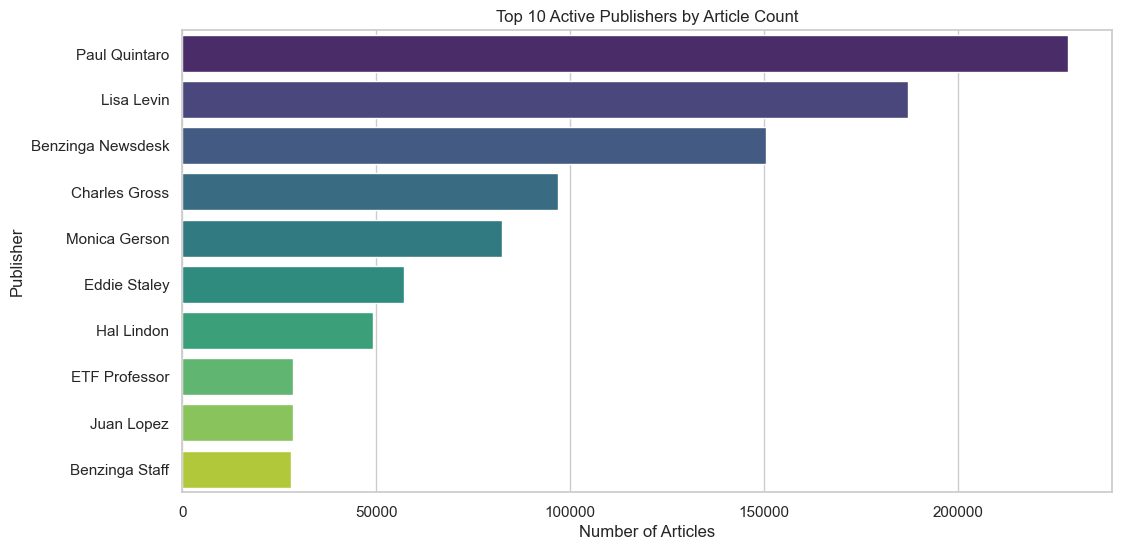

In [6]:
# --- Publisher Analysis ---

# Count unique publishers
num_publishers = df['publisher'].nunique()
print(f"Total unique publishers: {num_publishers}")

# Top 10 most active publishers
top_publishers = df['publisher'].value_counts().head(10)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top 10 Active Publishers by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


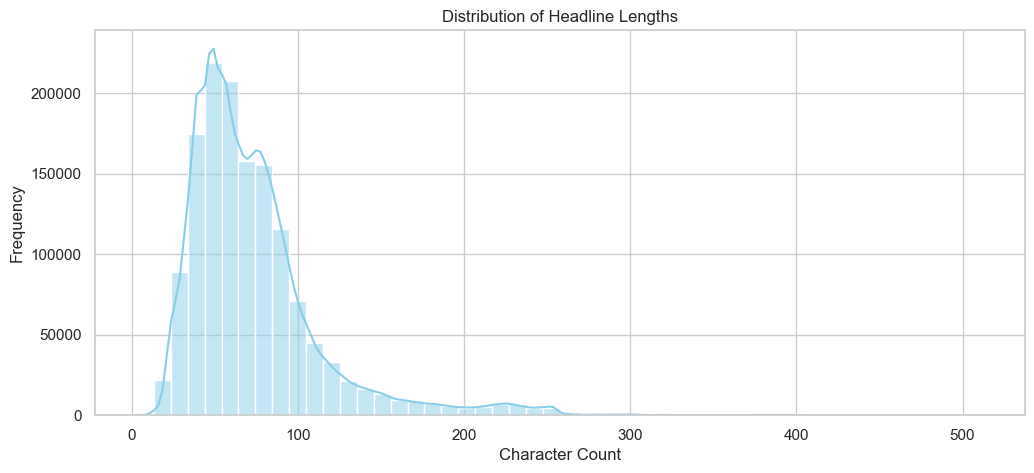

In [7]:
# --- Headline Length Analysis ---

# Calculate length of each headline
df['headline_length'] = df['headline'].astype(str).apply(len)

# Basic descriptive stats of length
print(df['headline_length'].describe())

# Visualization
plt.figure(figsize=(12, 5))
sns.histplot(df['headline_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()

## Time Series Analysis
Investigating publication trends over time, specifically looking at activity by day of the week.

C:\Users\FORWARD\AppData\Local\Temp\ipykernel_6600\3529756957.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_week', order=days_order, palette='magma')


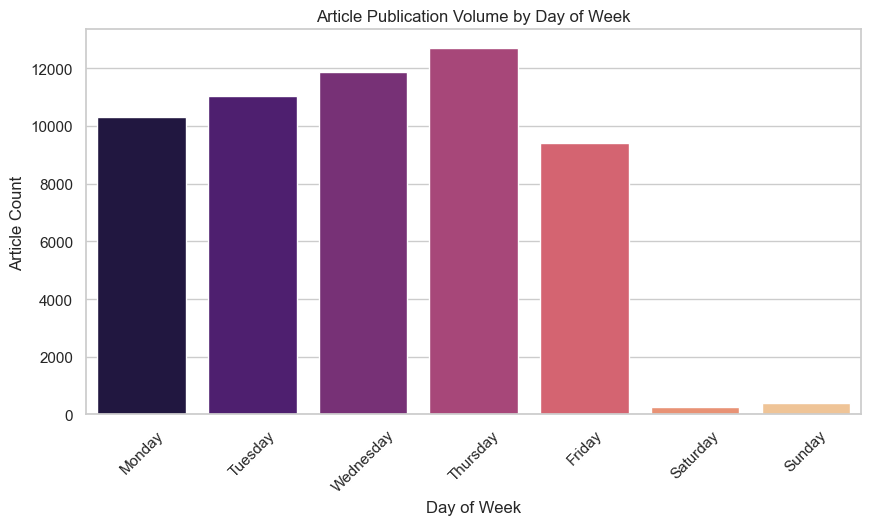

In [8]:
# Extract Day of Week (Monday=0, Sunday=6)
df['day_of_week'] = df['date'].dt.day_name()

# Define order for the plot
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Visualization: News Volume by Day of Week
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='day_of_week', order=days_order, palette='magma')
plt.title('Article Publication Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Article Count')
plt.xticks(rotation=45)
plt.show()

## Text Analysis (N-gram frequency)
Analyzing common unigrams (single words) and bigrams (two-word phrases) in the headlines, excluding common stop words.

C:\Users\FORWARD\AppData\Local\Temp\ipykernel_6600\2496852974.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=top_df, palette='coolwarm')


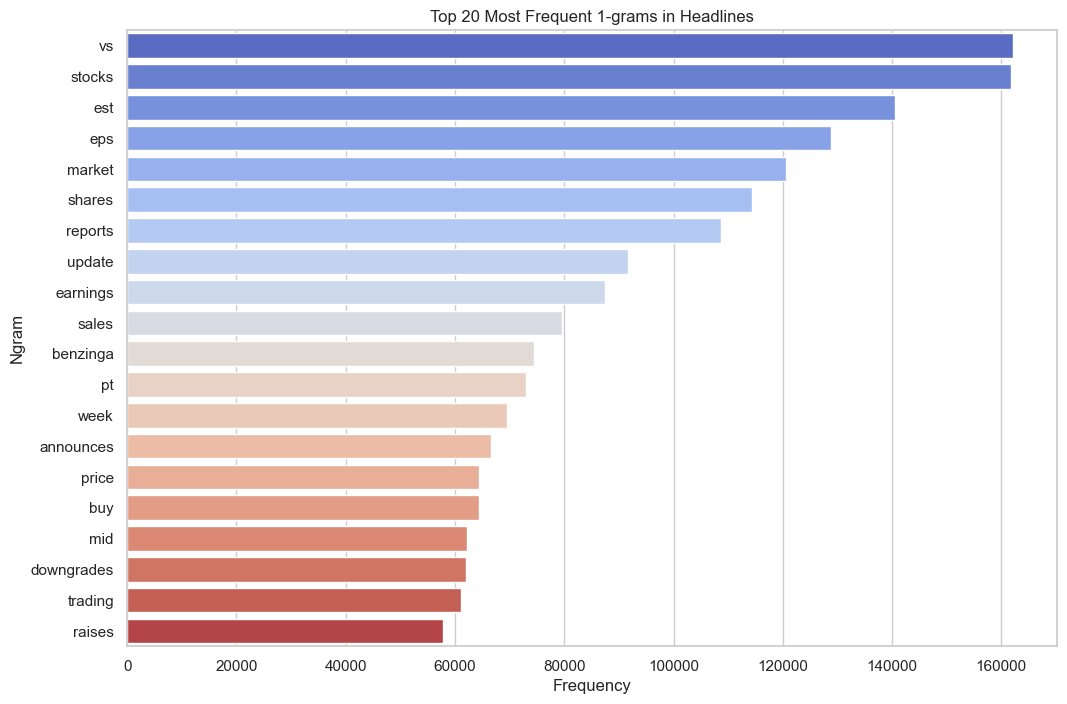

C:\Users\FORWARD\AppData\Local\Temp\ipykernel_6600\2496852974.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=top_df, palette='coolwarm')


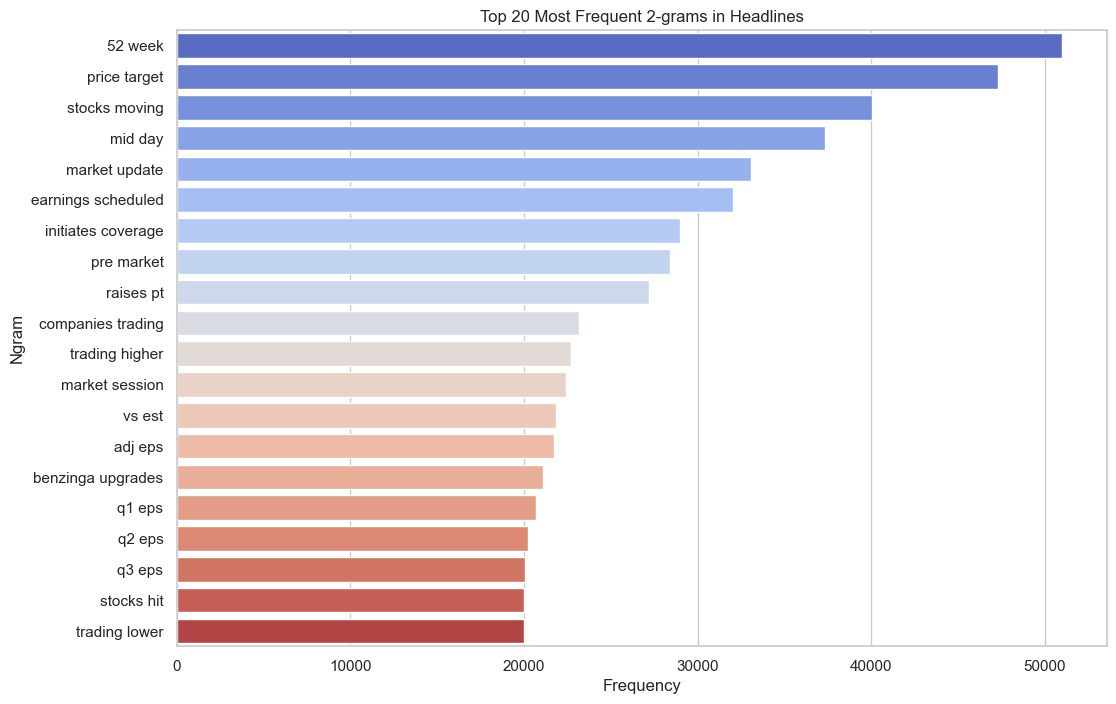

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams(text_series, n=2, top_k=20):
    """
    Utility function to find and plot top n-grams.
    """
    # Initialize CountVectorizer
    # stop_words='english' removes standard English stop words
    # ngram_range=(n, n) looks for specific n-gram size
    vec = CountVectorizer(stop_words='english', ngram_range=(n, n)).fit(text_series.dropna())

    # Transform text to bag of words
    bag_of_words = vec.transform(text_series.dropna())

    # Sum counts and get vocabulary
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    # Sort by frequency
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_df = pd.DataFrame(words_freq[:top_k], columns=['Ngram', 'Frequency'])

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Frequency', y='Ngram', data=top_df, palette='coolwarm')
    plt.title(f'Top {top_k} Most Frequent {n}-grams in Headlines')
    plt.show()

# --- Run the analysis ---

# Plot Top 20 Unigrams (Single meaningful words)
plot_top_ngrams(df['headline'], n=1, top_k=20)

# Plot Top 20 Bigrams (Two-word phrases)
# This often reveals more context, like "price target" or "quarterly results"
plot_top_ngrams(df['headline'], n=2, top_k=20)